In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

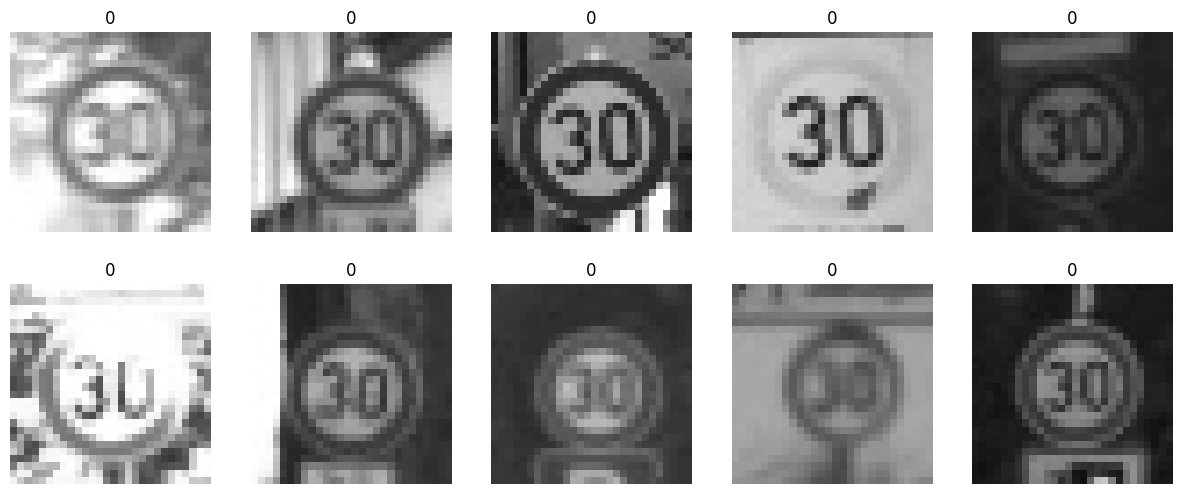

In [3]:
folder = 'subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

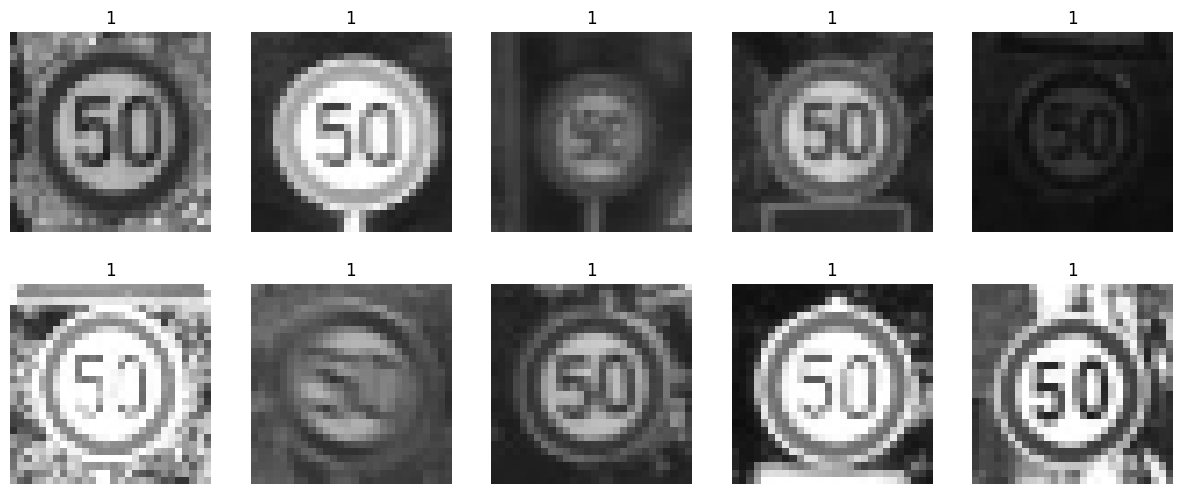

In [4]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [5]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))


Num samples class_0 2220
Num samples class_1 2250


In [6]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


But now we have a problem. We cannot just feed the image to a neuron since the neuron inputs are flat (one dimensional). On the other hand, the images are 2D matrices. Therefore, we need to "flatten" the images to a one dimensional vector of pixels.


In [7]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.015996456146240234


random mix


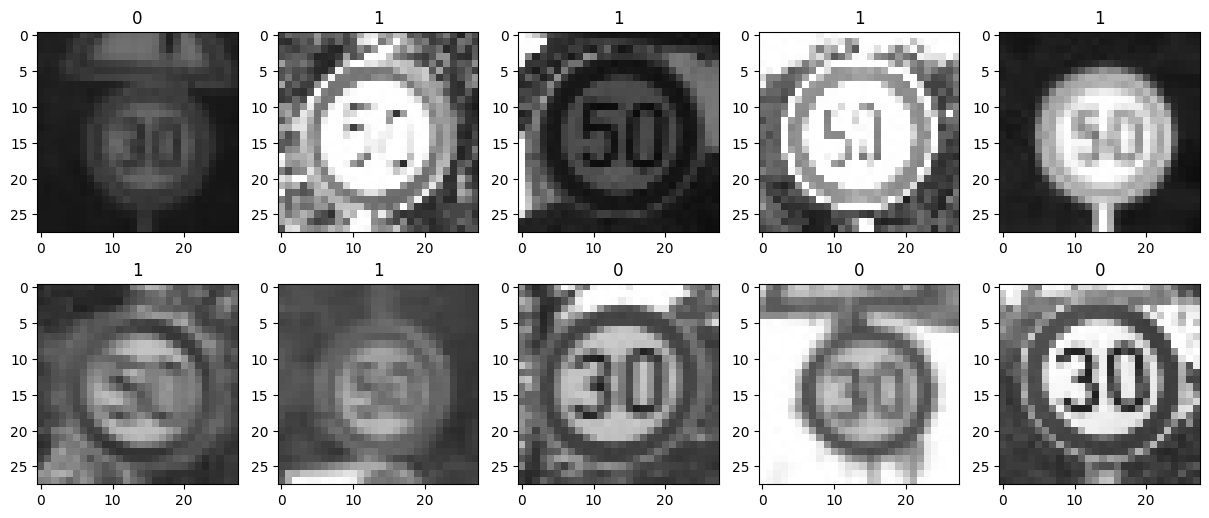

In [8]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [9]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [21]:
inputs = Input(shape=(pixels.shape[1],))

outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
#tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [14]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')


In [15]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.3167
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.2180
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.1743
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.1572
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.1365
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1250
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.1185
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.1062
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0999
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.0995


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

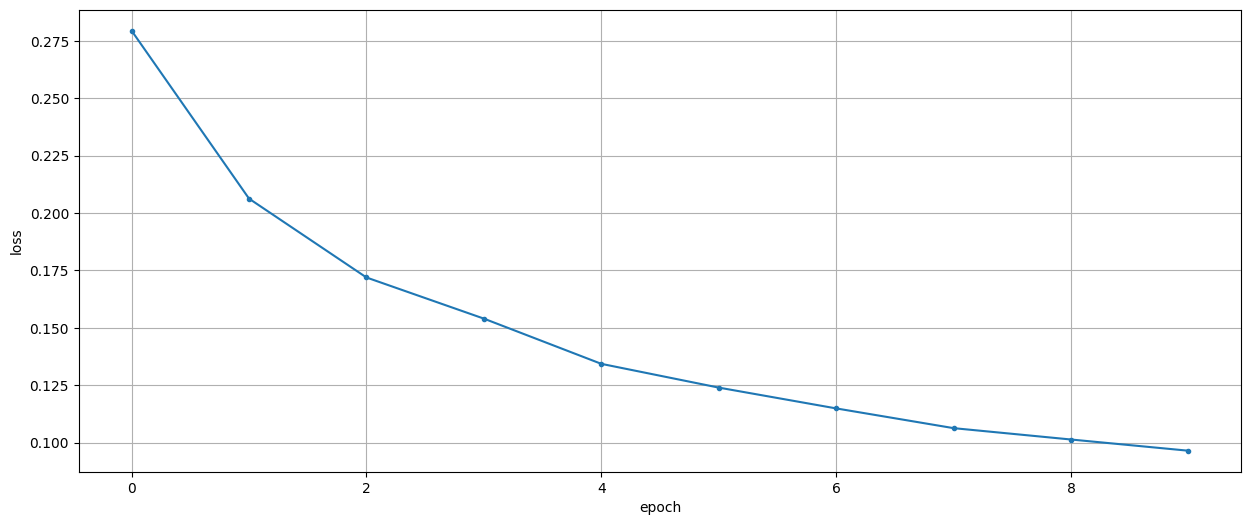

In [16]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.4109075] [0.4109075]


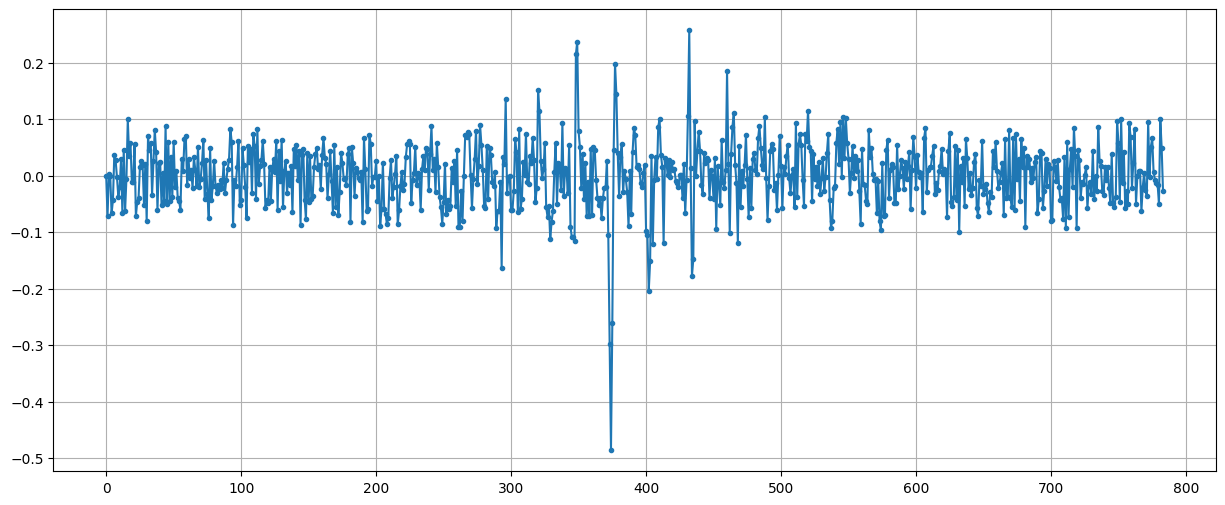

In [17]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [18]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.3849951]] 0
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
Accuracy 0.9288590604026845


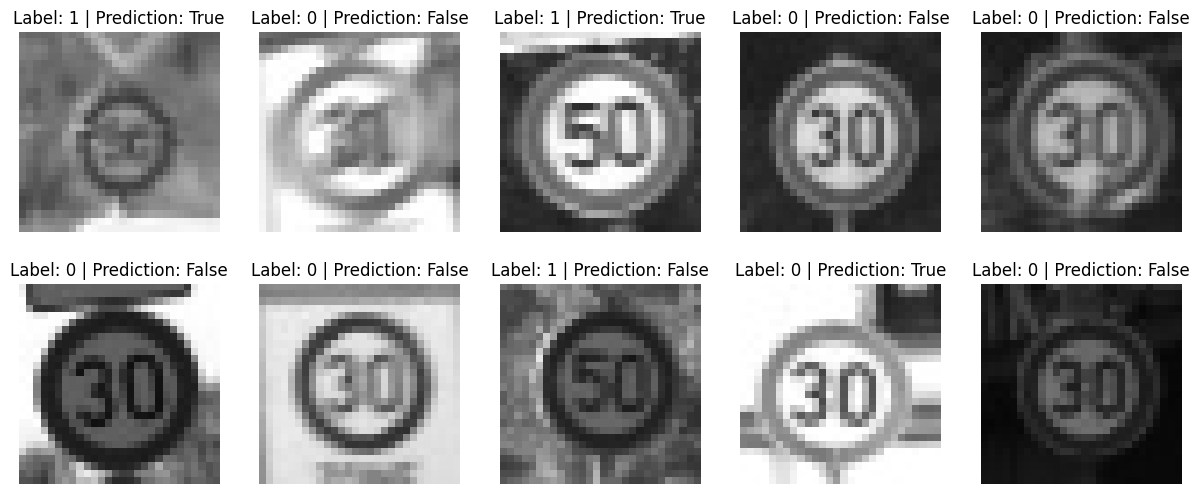

In [31]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

In [22]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(10, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(outputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,861 (30.71 KB)

 Trainable params: 7,861 (30.71 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:

model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [53]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 0.0845
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0782
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.0745
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0705
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0678
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0701
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0652
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.0636
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0675
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0643


[ 0.19456671 -0.00677712 -0.00670412 -0.16421582 -0.00600534 -0.00638397
  0.02152923 -0.11618757 -0.00555807  0.37488762] [ 0.19456671 -0.00677712 -0.00670412 -0.16421582 -0.00600534 -0.00638397
  0.02152923 -0.11618757 -0.00555807  0.37488762]


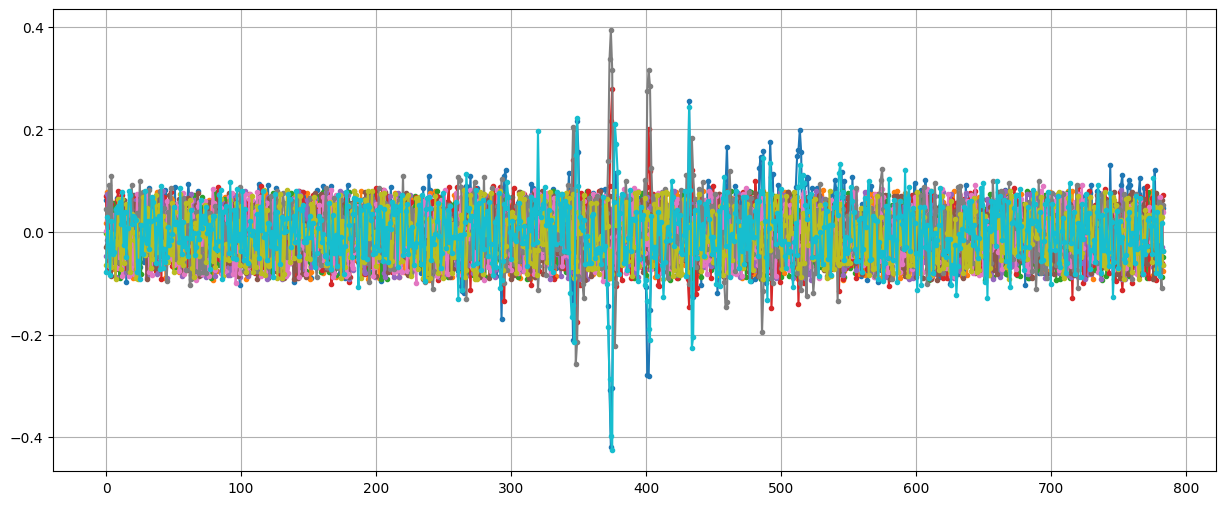

In [54]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

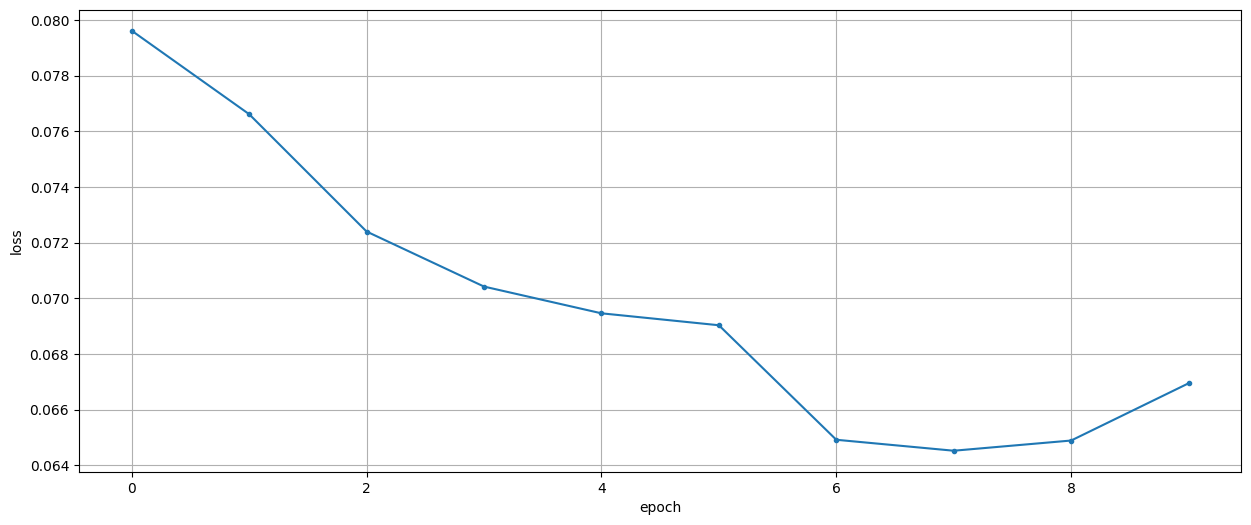

In [55]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [64]:
model.compile(optimizer ='SGD', loss = 'mean_squared_error') 
#model.compile(optimizer ='RMSprop', loss = 'mean_squared_error') 

In [65]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0534
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0514
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0499
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0484
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.0476
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0473
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0488
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0461
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0486
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0464


Text(0.5, 1.0, 'SGD optimizer')

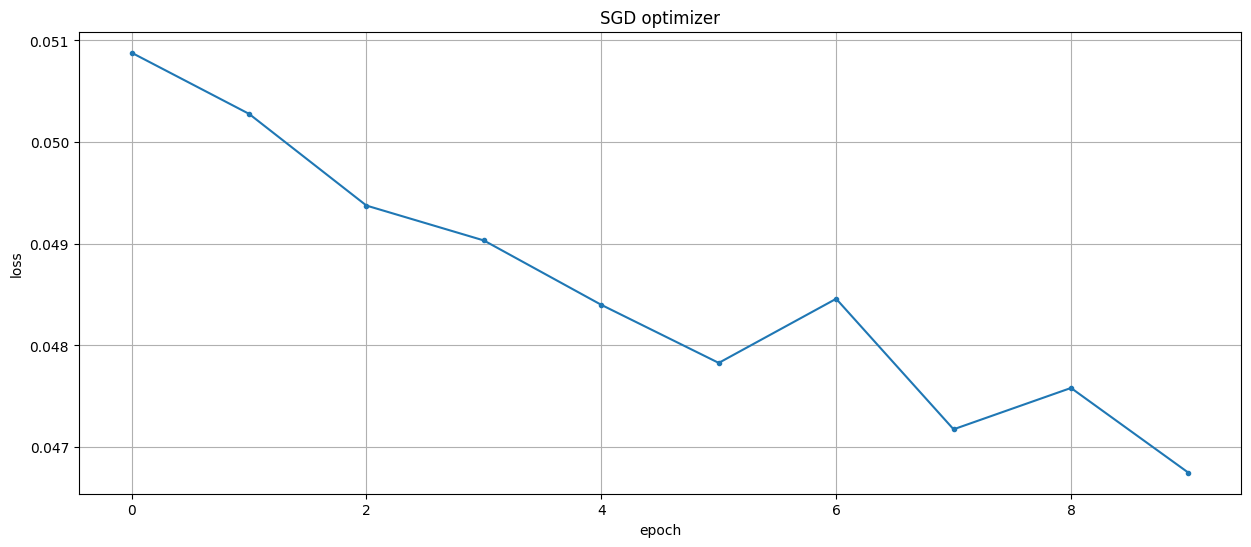

In [66]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')
plt.title("SGD optimizer")

In [67]:
model.compile(optimizer ='RMSprop', loss = 'mean_squared_error') 

In [68]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0884
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.0781
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.0724
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0710  
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.0713
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0656
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0742
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0663
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0684
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.0740


Text(0.5, 1.0, 'RMSprop optimizer')

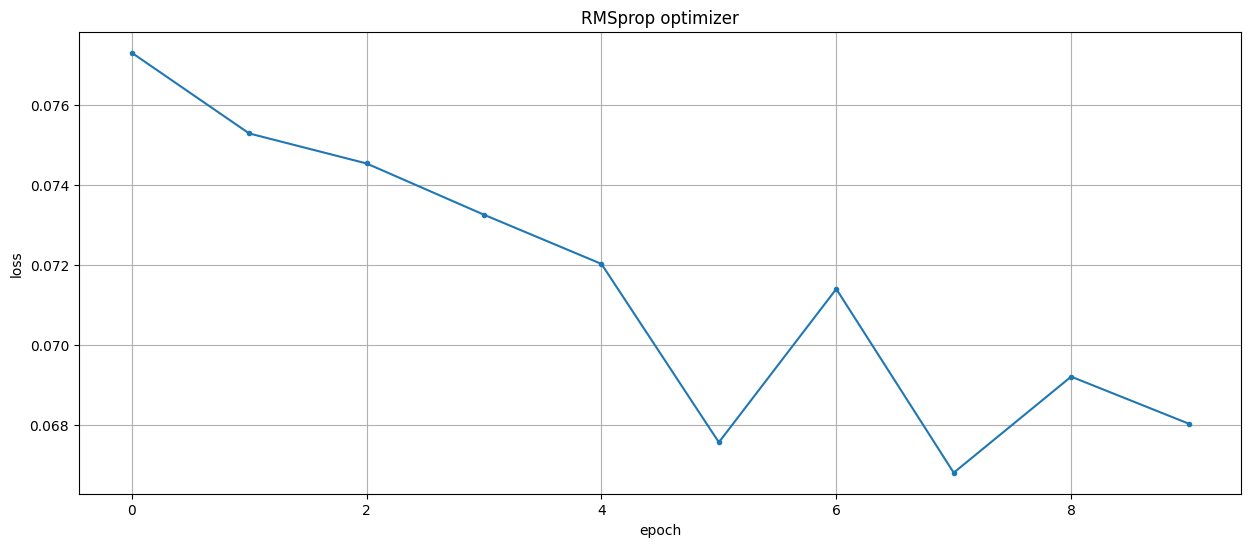

In [69]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')
plt.title("RMSprop optimizer")

Увеличив количество слоев до 10 добились боле резкого снижения loss, все значения ниже   <0.1, то есть получения удовлетворительного результата на меньшем количестве epoch. Используя различные оптимизаторы 'SGD', 'rmsprop','adam'  по графикам видно что optimizer ='adam' дает наиболее плавное  планомерное уменьшение loss  , однако SGD дал лучший результат уменьшив верхнюю границу loss до  0.0534
